In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
file_2015 = "Data/NCDB_2015.csv"
file_2016 = "Data/NCDB_2016.csv"
file_2017 = "Data/NCDB_2017.csv"

df_2015 = pd.read_csv(file_2015)
df_2016 = pd.read_csv(file_2016)
df_2017 = pd.read_csv(file_2017)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
df_ncdb_2015_2016 = pd.concat([df_2015,df_2016])

In [24]:
df_ncdb = pd.concat([df_ncdb_2015_2016, df_2017])

In [25]:
df_ncdb.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,2015,1,1,16,2,1,04,01,2,4,...,01,2009,UU,U,UU,UU,U,UU,U,2218030
1,2015,1,1,16,2,1,04,01,2,4,...,01,2009,01,F,64,QQ,2,02,U,2218030
2,2015,1,1,07,2,2,31,02,4,3,...,01,2014,UU,U,UU,UU,U,UU,U,2218034
3,2015,1,1,07,2,2,31,02,4,3,...,01,2014,01,M,27,QQ,2,02,U,2218034
4,2015,1,1,07,2,2,31,02,4,3,...,01,2014,02,M,37,13,2,02,2,2218034


In [26]:
df_ncdb.dtypes

C_YEAR     int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE     int64
dtype: object

In [27]:
df_without_uu = df_ncdb[df_ncdb['C_MNTH']!='UU']

In [28]:
df_without_uu.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,2015,1,1,16,2,1,04,01,2,4,...,01,2009,UU,U,UU,UU,U,UU,U,2218030
1,2015,1,1,16,2,1,04,01,2,4,...,01,2009,01,F,64,QQ,2,02,U,2218030
2,2015,1,1,07,2,2,31,02,4,3,...,01,2014,UU,U,UU,UU,U,UU,U,2218034
3,2015,1,1,07,2,2,31,02,4,3,...,01,2014,01,M,27,QQ,2,02,U,2218034
4,2015,1,1,07,2,2,31,02,4,3,...,01,2014,02,M,37,13,2,02,2,2218034


In [31]:
df_without_uu['C_MNTH'] = df_without_uu['C_MNTH'].astype(str).astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_without_uu.dtypes

C_YEAR     int64
C_MNTH     int32
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE     int64
dtype: object

In [36]:
df_without_uu.groupby(['C_YEAR', 'C_MNTH']).nunique()['C_CASE']

C_MNTH  C_YEAR
1       2015      10740
        2016       9896
        2017       9005
2       2015       9783
        2016       8831
        2017       8017
3       2015       7840
        2016       7959
        2017       8064
4       2015       7445
        2016       8056
        2017       7552
5       2015       9468
        2016       9611
        2017       9301
6       2015      10199
        2016      10579
        2017      10182
7       2015      10739
        2016      10522
        2017      10301
8       2015      10379
        2016      10646
        2017      10135
9       2015      10372
        2016      10557
        2017      10314
10      2015      10523
        2016      10359
        2017      10277
11      2015      10382
        2016      10472
        2017      10549
12      2015      10178
        2016      10702
        2017      10709
Name: C_CASE, dtype: int64

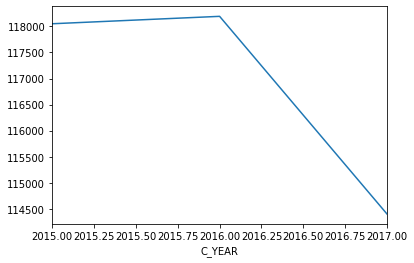

In [37]:
df_without_uu.groupby(['C_YEAR']).nunique()['C_CASE'].plot()